In [ ]:
名义变量、等级变量统称为分类变量，又称为维度指标：时间、年度
连续变量为度量指标：利润、收入、利润率

In [ ]:
 汇总表
        地区（分类变量）

产品（分类变量）  收入（连续变量）  

In [ ]:
            频次
分类变量：
            百分比
sns.district.value_counts()  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import matplotlib
#% 创建分割

In [4]:
os.chdir(r'E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第三章\提交-第三讲：信用卡客户特征分析-产品客户画像初步\提交-第三讲：信用卡客户特征分析-产品客户画像初步\数据与脚本\4describe')
snd  = pd.read_csv('SndHsPr.csv')
snd

,dist,roomnum,halls,AREA,floor,subway,school,price
0,chaoyang,1,0,46.06,middle,1,0,48850
1,chaoyang,1,1,59.09,middle,1,0,46540
2,haidian,5,2,278.95,high,1,1,71662
3,haidian,3,2,207.00,high,1,1,57972
4,fengtai,2,1,53.32,low,1,1,71268
...,...,...,...,...,...,...,...,...
16205,chaoyang,3,1,76.33,middle,1,0,52405
16206,chaoyang,3,1,76.42,middle,1,0,52343
16207,chaoyang,2,1,61.79,high,1,0,50170
16208,chaoyang,1,1,42.89,high,1,0,52693


In [3]:
snd.dtypes

dist        object
roomnum      int64
halls        int64
AREA       float64
floor       object
subway       int64
school       int64
price        int64
dtype: object

In [5]:
district = {'fengtai':'丰台区','haidian':'海淀区','chaoyang':'朝阳区','dongcheng':'东城区','xicheng':'西城区','shijingshan':'石景山区'}
snd['district'] = snd.dist.map(district)#取元素
snd.head()

,dist,roomnum,halls,AREA,floor,subway,school,price,district
0,chaoyang,1,0,46.06,middle,1,0,48850,朝阳区
1,chaoyang,1,1,59.09,middle,1,0,46540,朝阳区
2,haidian,5,2,278.95,high,1,1,71662,海淀区
3,haidian,3,2,207.00,high,1,1,57972,海淀区
4,fengtai,2,1,53.32,low,1,1,71268,丰台区


In [ ]:
下面是一个分类变量

In [6]:
#snd.district向量
snd.district.value_counts()# 返回的是series

丰台区     2947
海淀区     2919
朝阳区     2864
东城区     2783
西城区     2750
石景山区    1947
Name: district, dtype: int64

<AxesSubplot:>

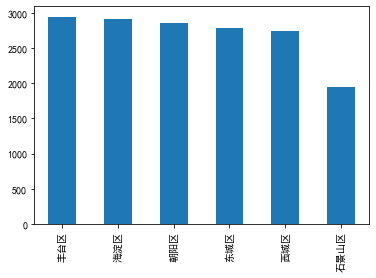

In [8]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Simhei']# 之人默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号‘-’显示为方块的问题
snd.district.value_counts().plot(kind='bar')

<AxesSubplot:ylabel='district'>

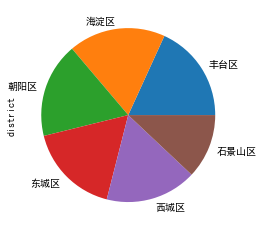

In [5]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['Simhei']# 之人默认字体
mpl.rcParams['axes.unicode_minus'] = False # 解决保存图像是负号‘-’显示为方块的问题
snd.district.value_counts().plot(kind='pie')

In [ ]:
下面是一个连续变量

In [9]:
snd.price.mean()#均值

61151.810919185686

In [10]:
snd.price.median()# 中位数，<均值，所以是右偏函数

57473.0

In [11]:
snd.price.std()# 标准差：比较离散程度的时候有用，一个标准差没有用

22293.35814732866

In [12]:
snd.price.skew()#判断是否有篇，>1 表示严重右偏

0.6794935869486859

<AxesSubplot:>

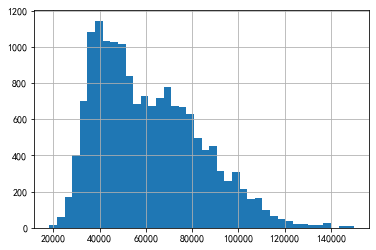

In [13]:
snd.price.hist(bins=40)# 分40组

In [14]:
snd.price.agg(['mean','median','sum','std','skew'])# 出多个统计量

mean      6.115181e+04
median    5.747300e+04
sum       9.912709e+08
std       2.229336e+04
skew      6.794936e-01
Name: price, dtype: float64

In [ ]:
#取分位点的
snd.price.quantile([0.01,0.5,0.99])

In [ ]:
两个变量级的关系：分类变量

In [8]:
#dataframe形式，生成数据框

sub_sch = pd.crosstab(snd.district,snd.school)
sub_sch   # 频次表

school,0,1
district,,
东城区,1508,1275
丰台区,2853,94
朝阳区,2267,597
海淀区,1533,1386
石景山区,1929,18
西城区,1207,1543


<AxesSubplot:xlabel='district'>

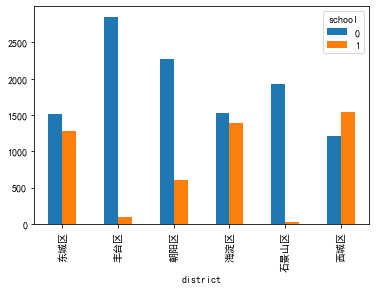

In [9]:
sub_sch.plot(kind='bar')
# 纵轴分类，分类柱形图

<AxesSubplot:xlabel='district'>

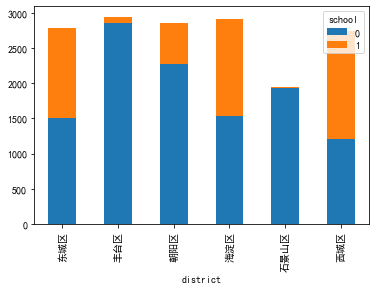

In [10]:
# 堆叠柱形图
sub_sch.plot(kind='bar',stacked=True)

In [ ]:
资源分配：一个分类变量在另一个分类变量对应分布的均匀情况，看资源有没有倾向性的分配情况，更多的是做标准化的堆叠柱形图，

In [ ]:
标准化堆叠柱形图：对比占比情况

In [ ]:
sub_sch 

In [11]:
sub_sch["sum1"]=sub_sch.sum(1)# 先行后列，1是汇总出一个列，0是汇总出了一个行

In [12]:
sub_sch.head()

school,0,1,sum1
district,,,
东城区,1508,1275,2783
丰台区,2853,94,2947
朝阳区,2267,597,2864
海淀区,1533,1386,2919
石景山区,1929,18,1947


In [13]:
#按行求 百分比
sub_sch = sub_sch.div(sub_sch.sum1,axis = 0)# 除法 得到百分比，按行

In [14]:
sub_sch

school,0,1,sum1
district,,,
东城区,0.541861,0.458139,1.0
丰台区,0.968103,0.031897,1.0
朝阳区,0.791550,0.208450,1.0
海淀区,0.525180,0.474820,1.0
石景山区,0.990755,0.009245,1.0
西城区,0.438909,0.561091,1.0


In [ ]:
堆叠柱形图可以看出样本量，不能看占比
标准化堆叠柱形图：两个分类变量有没有关系，不同区与教育资源是否倾斜

In [ ]:
标准化堆叠柱形图可以看出占比情况，但不能看出样本量的大小
所以用主子的胖瘦来看样本量

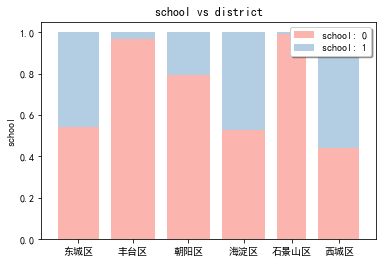

In [15]:
from stack2dim import *
stack2dim(snd,i='district',j='school')

In [16]:
help(stack2dim)

Help on function stack2dim in module stack2dim:

stack2dim(raw, i, j, rotation=0, location='upper right')
    此函数是为了画两个维度标准化的堆积柱状图
    raw为pandas的DataFrame数据框
    i、j为两个分类变量的变量名称，要求带引号，比如"school"
    rotation：水平标签旋转角度，默认水平方向，如标签过长，可设置一定角度，比如设置rotation = 40
    location：分类标签的位置，如果被主体图形挡住，可更改为'upper left'



In [15]:
from pyecharts.charts import Map

In [ ]:
pip install echarts-countries-pypkg
pip install echarts-china-provinces-pypkg#省级地图
pip install echarts-china-cities-pypkg#市级地图

In [21]:
import pyecharts

In [22]:
!pip install echarts-countries-pypkg  #安装全球地图

  Using cached echarts-countries-pypkg-0.1.6.tar.gz (2.0 MB)
  Using cached lml-0.1.0-py2.py3-none-any.whl (10 kB)
  Using cached pyecharts_jupyter_installer-0.0.3-py2.py3-none-any.whl (4.7 kB)
  Created wheel for echarts-countries-pypkg: filename=echarts_countries_pypkg-0.1.6-py3-none-any.whl size=2118072 sha256=72154e18ed4a74087391681041ebc45fb5288474991e3275cbbd1c9119ec5681
  Stored in directory: c:\users\cyc\appdata\local\pip\cache\wheels\99\7c\22\66d77317d653d3ee765f360aa9ad771e7995796dd528c5ad40
Successfully built echarts-countries-pypkg


In [26]:
!pip install echarts-china-provinces-pypkg   

  Created wheel for echarts-china-provinces-pypkg: filename=echarts_china_provinces_pypkg-0.0.3-py3-none-any.whl size=760432 sha256=f0593bf74cdb32d4cf84c38d8e3ef27387b95c33df0a5ff3091a7b667518f3ec
  Stored in directory: c:\users\cyc\appdata\local\pip\cache\wheels\1e\88\d6\b929142b770bf95e832f952f4baa2e363e7fd71c29d800d7ba
Successfully built echarts-china-provinces-pypkg


In [30]:
!pip install echarts-china-cities-pypkg

In [61]:
snd_price = zip(snd.price.groupby(snd.district).mean().index,
                  snd.price.groupby(snd.district).mean().values)
snd_price

In [62]:
ss = [list(z) for z in snd_price]
ss

[['东城区', 71883.59504132232],
 ['丰台区', 42500.90430946725],
 ['朝阳区', 52800.62465083799],
 ['海淀区', 68757.6022610483],
 ['石景山区', 40286.889573703134],
 ['西城区', 85674.77854545455]]

In [64]:
from pyecharts import options as opts
from pyecharts.charts import Map
from pyecharts.faker import Faker

c = (
    Map()
    .add("商家A", [list(z) for z in zip(Faker.provinces, Faker.values())], "china")
    .set_global_opts(title_opts=opts.TitleOpts(title="Map-基本示例"))
    .render("map_base.html")
)


In [65]:
[list(z) for z in zip(Faker.provinces, Faker.values())]

[['广东', 34],
 ['北京', 101],
 ['上海', 53],
 ['江西', 40],
 ['湖南', 75],
 ['浙江', 43],
 ['江苏', 46]]

In [72]:

min_ = snd.price.groupby(snd.dist).mean().min()
max_ = snd.price.groupby(snd.dist).mean().max()
from pyecharts import options as opts
from pyecharts.charts import Map
c = (
    Map()
    .add("", ss, "china")
    .set_global_opts(title_opts=opts.TitleOpts(title="Map-基本示例"))
    .render("E:\map_base.html")
)


In [71]:
from pyecharts import options as opts
from pyecharts.charts import Map
c = (
    Map()
    .add("", ss, "china")
    .set_global_opts(title_opts=opts.TitleOpts(title="北京收入"))
    visual_range=[min_, max_]
    .render("E:\map_base.html")
)

In [ ]:
data = pd.read_excel('GDP.xlsx')
province = list(data["province"])
gdp = list(data["2019_gdp"])
list = [list(z) for z in zip(province,gdp)]


In [ ]:
c = (
    Map(init_opts=opts.InitOpts(width="1000px", height="600px"))  #初始化地图大小
    .set_global_opts(
        title_opts=opts.TitleOpts(title="北京房价  单位:亿元"),  #配置标题
        visualmap_opts=opts.VisualMapOpts(
            type_ = "scatter"   #散点类型
        )
    )
    .add("GDP",list,maptype="北京")  #将list传入，地图类型为中国地图
    .render("Map1.html")
)


In [ ]:
分类变量+一个连续变量：按照分类变量分组对连续变量进行统计量

In [ ]:
# 区的房价有无差异

<AxesSubplot:xlabel='district'>

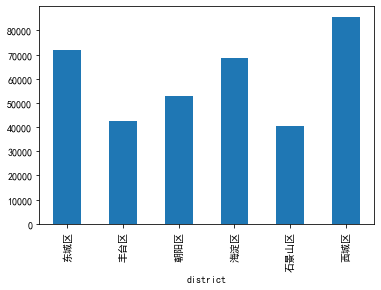

In [49]:
#柱形图
snd.price.groupby(snd.district).mean().plot(kind='bar')

<AxesSubplot:ylabel='district'>

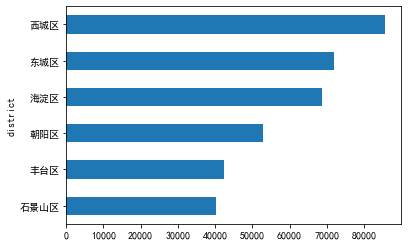

In [51]:
# 条形图
snd.price.groupby(snd.district).mean().sort_values(ascending=True).plot(kind='barh')

In [28]:
snd.price.groupby(snd.district).mean()

district
东城区     71883.595041
丰台区     42500.904309
朝阳区     52800.624651
海淀区     68757.602261
石景山区    40286.889574
西城区     85674.778545
Name: price, dtype: float64

<AxesSubplot:xlabel='district', ylabel='price'>

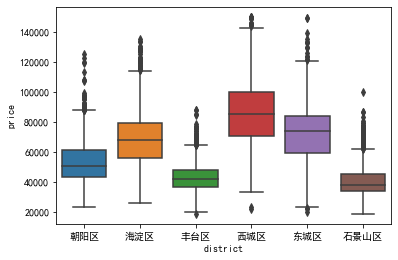

In [52]:
# 分类盒须图:可以比较不同分类水平上的变化情况
sns.boxplot(x = 'district', y = 'price', data = snd)

In [ ]:
汇总表：两个分类变量和一个连续变量统计量

In [53]:
snd.pivot_table(values='price', index='district', columns='school', aggfunc=np.mean)


school,0,1
district,,
东城区,66276.887931,78514.900392
丰台区,42291.003505,48871.617021
朝阳区,51588.511689,57403.405360
海淀区,61385.803653,76911.258297
石景山区,40353.883878,33107.333333
西城区,76989.369511,92468.873623


<AxesSubplot:xlabel='district'>

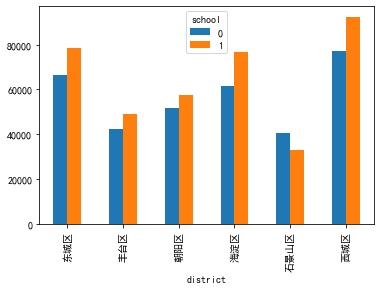

In [54]:

snd.pivot_table(values='price', index='district', columns='school', aggfunc=np.mean).plot(kind = 'bar')

In [ ]:
以上为描述变量的总结

In [ ]:
两个连续变量的关系、双轴图mapplot、

In [29]:
gdp = pd.read_csv(r'E:\Ajiao\LiXian\资料\技术实详解与商业实战\280_Ben_八大直播八大案例配套课件\第三章\提交-第三讲：信用卡客户特征分析-产品客户画像初步\提交-第三讲：信用卡客户特征分析-产品客户画像初步\数据与脚本\4describe\gdp_gdpcr.csv',encoding='gbk')
gdp

,year,GDP,GDPCR
0,2000,100280.1,8.5
1,2001,110863.1,8.3
2,2002,121717.4,9.1
3,2003,137422.0,10.0
4,2004,161840.2,10.1
5,2005,187318.9,11.4
6,2006,219438.5,12.7
7,2007,270232.3,14.2
8,2008,319515.5,9.7
9,2009,349081.4,9.4


In [33]:
x = list(gdp.year)
GDP = list(gdp.GDP)
GDPCR = list(gdp.GDPCR)
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [32]:
# 主轴：柱形图
ax1 = fig.add_subplot(111)
ax1.bar(x,GDP)
ax1.set_ylabel('GDP')
ax1.set_title("GDP of China(2000-2017)")
ax1.set_xlim(2000,2017)
#副轴：
ax2 = ax1.twinx()
ax2.plot(x,GDPCR,'r')
ax2.set_ylabel('Increase Ratio')
ax2.set_xlabel('Year')

<ipython-input-32-547b27c3d00a>:2: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = fig.add_subplot(111)


Text(0.5, 0, 'Year')

In [ ]:
# 散点图

In [ ]:
# 逻辑回归图woe

In [ ]:
#

Text(0.5, 0, 'Year')

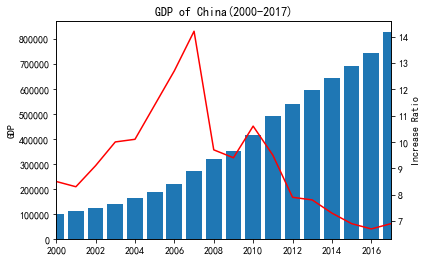

In [34]:
gdp = pd.read_csv('gdp_gdpcr.csv',encoding = 'gbk')
gdp.head()
# In[45]:

x = list(gdp.year)
GDP = list(gdp.GDP)
GDPCR = list(gdp.GDPCR)
fig = plt.figure()

ax1 = fig.add_subplot(111)
ax1.bar(x,GDP)
ax1.set_ylabel('GDP')
ax1.set_title("GDP of China(2000-2017)")
ax1.set_xlim(2000,2017)

ax2 = ax1.twinx()
ax2.plot(x,GDPCR,'r')
ax2.set_ylabel('Increase Ratio')
ax2.set_xlabel('Year')